# 실습 코드 URL
- https://dottxt-ai.github.io/outlines/latest/features/models/ollama/

In [3]:
!pip install outlines[ollama] ollama

### (예시) Model Initialization
- client 및 async_client 두 종류 예시.

In [10]:
import ollama
import outlines

# Create the client or async client
client = ollama.Client()
async_client = ollama.AsyncClient()

# Create a sync model
model = outlines.from_ollama(
    client,
    "qwen2.5vl:3b",
)

# Create an async model
model = outlines.from_ollama(
    async_client,
    "qwen2.5vl:3b",
)

## Synchronous Calls

### (예시) Text Generation

In [12]:
import ollama
import outlines

# Create the model
model = outlines.from_ollama(ollama.Client(), "qwen2.5vl:3b")

# Call it to generate text
response = model("리비아 수도는?")
print(response)

리비아의 수도는 튀니스입니다.


### (예시) Vision
- https://fastly.picsum.photos/id/237/400/300.jpg?hmac=32RuLp2fb9I2fzPP3U-6REXQ6sZAbN8ML7_dt3R7wQ8
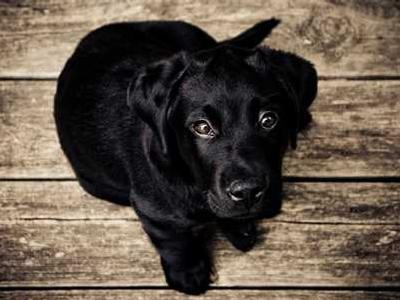

In [15]:
import io
import requests
import PIL
import ollama
import outlines
from outlines.inputs import Chat, Image

# Create the model
model = outlines.from_ollama(
    ollama.Client(),
    "qwen2.5vl:3b"
)

# Function to get an image
def get_image(url):
    r = requests.get(url)
    return PIL.Image.open(io.BytesIO(r.content))

# Create the chat input
prompt = Chat([
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": ["이미지 설명해봐.", Image(get_image("https://picsum.photos/id/237/400/300"))]
    },
])

# Call the model to generate a response
response = model(prompt)
print(response) # 'This is a picture of a black dog.'

죄송합니다, 저는 이미지에 대한 설명을 제공할 수 없습니다. 저는 텍스트 기반의 인공지능으로서 이미지에 대한 정보를 제공할 수 없습니다.


### (예시) Chat

In [17]:
import io
import requests
import PIL
import ollama
import outlines
from outlines.inputs import Chat, Image

# Create the model
model = outlines.from_ollama(
    ollama.Client(),
    "qwen2.5vl:3b"
)

# Function to get an image
def get_image(url):
    r = requests.get(url)
    return PIL.Image.open(io.BytesIO(r.content))

# Create the chat input
prompt = Chat([
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": ["이미지 설명해봐.", Image(get_image("https://picsum.photos/id/237/400/300"))]
    },
])

# Call the model to generate a response
response = model(prompt)
print(response) # 'This is a picture of a black dog.'

죄송합니다, 저는 이미지에 대한 설명을 제공할 수 없습니다. 저는 텍스트 기반의 인공지능으로서 이미지에 대한 정보를 제공할 수 없습니다.


### (예시) Streaming

In [21]:
import ollama
import outlines

# Create the model
model = outlines.from_ollama(ollama.Client(), "qwen2.5vl:3b")

# Stream text
for chunk in model.stream("Write a short story about a cat"):
    print(chunk, end="")

Once upon a time, in a cozy little house, there lived a curious and playful cat named Whiskers. Whiskers loved to explore the world around him, and he would often find himself in all sorts of adventures.

One day, Whiskers decided to go on a journey to see the world. He set off on his adventure, leaving behind his cozy home and the people who loved him.

As he traveled, Whiskers met all sorts of interesting creatures. He met a friendly fox who taught him how to hunt for food, a wise old owl who shared his knowledge of the night sky, and a group of playful rabbits who taught him how to play.

But Whiskers soon realized that he had left behind something important. He missed his family and friends, and he missed the warmth of his cozy home. He knew that he had to find his way back home.

With a heavy heart, Whiskers set off on his journey back to his home. He traveled through fields, over mountains, and through forests. He faced many challenges along the way, but he never gave up.

Finall

## Asynchronous Calls

### (예시) Basic Async Generation

In [26]:
import asyncio
import outlines
import ollama
import nest_asyncio

async def generate_text():
    # Create an async model
    async_client = ollama.AsyncClient()
    async_model = outlines.from_ollama(async_client, "qwen2.5vl:3b")

    result = await async_model("Write a haiku about Python.")
    print(result)

nest_asyncio.apply()

await generate_text()

Python code flows,
Syntax simple, easy to read,
Python, the language.


### (예시) Async Streaming

In [27]:
import asyncio
import outlines
import ollama

async def stream_text():
    async_client = ollama.AsyncClient()
    async_model = outlines.from_ollama(async_client, "qwen2.5vl:3b")

    async for chunk in async_model.stream("Tell me a story about a robot."):
        print(chunk, end="")

asyncio.run(stream_text())

Once upon a time, in a far-off galaxy, there was a robot named Zephyr. Zephyr was a unique robot, designed to be a companion for humans. He was built with advanced technology and was programmed to be friendly, helpful, and always ready to assist his human friends.

Zephyr's first job was to help a group of children who were lost in a forest. The children were scared and confused, and Zephyr was there to guide them and keep them safe. He used his advanced sensors to navigate through the dense trees and bushes, and his advanced communication system to keep the children in touch with their parents.

As they walked, Zephyr told them stories and shared his knowledge of the forest. He taught them about the different animals they might see, and how to avoid dangerous situations. The children were amazed by Zephyr's knowledge and his friendly demeanor.

After a few hours, the children's parents found them and rejoined the group. Zephyr was relieved to see them safe and happy. He knew that he h

### (예시) Concurrent Async Requests

In [28]:
import asyncio
import outlines
import ollama

async def generate_multiple():
    async_client = ollama.AsyncClient()
    async_model = outlines.from_ollama(async_client, "qwen2.5vl:3b")

    # Define multiple prompts
    prompts = [
        "Write a tagline for a coffee shop.",
        "Write a tagline for a bookstore.",
        "Write a tagline for a gym."
    ]

    tasks = [async_model(prompt) for prompt in prompts]
    results = await asyncio.gather(*tasks)

    for prompt, result in zip(prompts, results):
        print(f"{prompt}\n{result}\n")

asyncio.run(generate_multiple())

Write a tagline for a coffee shop.
"Start your day with a cup of our finest coffee."

Write a tagline for a bookstore.
"Discover the world of literature at our bookstore."

Write a tagline for a gym.
"Transform your body, transform your life."



## Structured Generation

In [38]:
from typing import List
from pydantic import BaseModel
import ollama
import outlines
import json

class Character(BaseModel):
    name: str
    age: int
    skills: List[str]

# Create the model
model = outlines.from_ollama(ollama.Client(), "tinyllama")

# Call it with the output type to generate structured text
result = model("Create a character", Character)
print(result)
# '{"name": "Evelyn", "age": 34, "skills": ["archery", "stealth", "alchemy"]}'
# The previous result is incomplete/invalid JSON, so model_validate_json will raise a ValidationError.
# To avoid the error, check if the result is valid JSON before validating.


try:
    parsed = json.loads(result)
    character = Character.model_validate(parsed)
    print(character)
except Exception as e:
    print("Error parsing character:", e)

{
    "name": "Maya",
    "age": 24,
    "skills": [
        "Programming",
        "Artificial Intelligence"
    ]
}


name='Maya' age=24 skills=['Programming', 'Artificial Intelligence']


## Complex Structured Generation

In [ ]:
from pydantic import BaseModel
from enum import Enum

class Rating(Enum):
    poor = 1
    fair = 2
    good = 3
    excellent = 4

class ProductReview(BaseModel):
    rating: Rating
    pros: list[str]
    cons: list[str]
    summary: str

review = model(
    "Review: The XPS 13 has great battery life and a stunning display, but it runs hot and the webcam is poor quality.",
    ProductReview,
    # max_new_tokens=200,
)

review = ProductReview.model_validate_json(review)
print(f"Rating: {review.rating.name}")  # "Rating: good"
print(f"Pros: {review.pros}")           # "Pros: ['great battery life', 'stunning display']"
print(f"Summary: {review.summary}")     # "Summary: Good laptop with great display but thermal issues"

TypeError: Object of type Rating is not JSON serializable